In [20]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import matplotlib.ticker as mticker
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
from scipy.interpolate import make_interp_spline
from scipy.stats import ttest_ind


In [2]:
def performances(label, pred):
    
    r = r2(label, pred)
    pearson_r = pearsonr(label, pred)[0]
    sp_cor = spearmanr(label, pred)[0]
    
    print(f'r-squared = {r:.4f} | pearson r = {pearson_r:.4f} | spearman R = {sp_cor:.4f}')
        
    return [r, pearson_r, sp_cor]


import scipy.stats as stats
from scipy.stats import spearmanr, pearsonr
def r2(x,y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    return r_value**2


In [3]:
def load_data(data, y_true_col, y_pred_col, diff_col):
    data[f'{diff_col}'] = abs(data[y_true_col] - data[y_pred_col])
    data.sort_values(f'{diff_col}', ascending = True, inplace = True)
    data[f'{diff_col}_rank'] = range(1, data.shape[0]+1)
    data.sort_values(y_pred_col, ascending = False, inplace = True)
    data[f'{y_pred_col}_rank'] = range(1, data.shape[0]+1)
    data.sort_values(y_true_col, ascending = False, inplace = True)
    data[f'{y_true_col}_rank'] = range(1, data.shape[0]+1)
    print(f'data.shape = {data.shape}')
    return data

In [4]:
def analysis_rank(data, pred_rank, diff_rank, cutoff = 10, print_ = False):   
    pred_n = sum(data.iloc[:cutoff][pred_rank] <= cutoff)
    diff_n = sum(data.iloc[:cutoff][diff_rank] <= cutoff)
    pred_r = pred_n/cutoff
    diff_r = diff_n/cutoff
#     print(f'From samples with Cut-Off={cutoff} Top Labels (y_true): \n(1) {pred_n} samples are in top {cutoff} Ranked y_pred \n(2) {diff_n} samples are in top {cutoff} Ranked diff=|y_pred-label|')
    if print_: print(f'From {len(data)} samples with CutOff={cutoff} Top Labels: The ratios (1) Diff_rank={diff_n}/{cutoff}={diff_n/cutoff:.2f} (2) Pred_rank={pred_n}/{cutoff}={pred_n/cutoff:.2f} ')
    return pred_n, diff_n, pred_r, diff_r


In [5]:
def multi_cutoffs_analysis(data, pred_rank, diff_rank, cutoffs):
    top_pred_n, top_diff_n, top_pred_r, top_diff_r = [], [], [], []
    for cutoff in cutoffs:
        np, nd, rp, rd = analysis_rank(data, pred_rank, diff_rank, cutoff)
        top_pred_n.append(np)
        top_diff_n.append(nd)
        top_pred_r.append(rp)
        top_diff_r.append(rd)
    data_analysis = pd.DataFrame([cutoffs, top_pred_n, top_pred_r, top_diff_n, top_diff_r], 
                    index = ['Cut-Off', '# Top Pred in Cut-Off', 'Ratio: Top Pred in Cut-Off', 
                             '# Top Diff in Cut-Off', 'Ratio: Top Diff in Cut-Off']).T
    data_analysis['# Samples'] = len(data)
    data_analysis[['# Samples', 'Cut-Off', '# Top Pred in Cut-Off', '# Top Diff in Cut-Off']] = data_analysis[['# Samples', 'Cut-Off', '# Top Pred in Cut-Off', '# Top Diff in Cut-Off']].astype('int')
    data_analysis[['Ratio: Top Pred in Cut-Off', 'Ratio: Top Diff in Cut-Off']] = data_analysis[['Ratio: Top Pred in Cut-Off', 'Ratio: Top Diff in Cut-Off']].round(2)
    return data_analysis

# UTR-LM

In [13]:
te_res = pd.read_csv('./revised_results/ExperimentData_ZeroShot_TE.csv')
te_res = load_data(te_res, 'label', 'y_pred_pushLen100_TE', 'pushLen100_diff')
te_res.to_csv('./revised_results/ExperimentData_ZeroShot_TE_withRanking.csv', index = False)

metrics_te = performances(te_res.label, te_res['y_pred_pushLen100_TE'])

cutoffs = list(range(1, len(te_res) + 1, 1))
label_ranking_te = multi_cutoffs_analysis(te_res, 'y_pred_pushLen100_TE_rank', 'pushLen100_diff_rank', cutoffs)
label_ranking_te.to_csv('./revised_results/ExperimentData_ZeroShot_TE_Label_Ranking.csv', index = False)

data.shape = (211, 13)
r-squared = 0.0108 | pearson r = 0.1039 | spearman R = 0.1902


In [14]:
mrl_res = pd.read_csv('./revised_results/ExperimentData_ZeroShot_MRL.csv')
mrl_res = load_data(mrl_res, 'label', 'y_pred_pushLen50_MRL', 'pushLen50_diff')
mrl_res.to_csv('./revised_results/ExperimentData_ZeroShot_MRL_withRanking.csv', index = False)

metrics_mrl = performances(mrl_res.label, mrl_res['y_pred_pushLen50_MRL'])

cutoffs = list(range(1, len(mrl_res) + 1, 1))
label_ranking_mrl = multi_cutoffs_analysis(mrl_res, 'y_pred_pushLen50_MRL_rank', 'pushLen50_diff_rank', cutoffs)
label_ranking_mrl.to_csv('./revised_results/ExperimentData_ZeroShot_MRL_Label_Ranking.csv', index = False)

data.shape = (211, 13)
r-squared = 0.0013 | pearson r = 0.0365 | spearman R = 0.1292


# benchmark-Optimus

In [16]:
optimus_results = pd.read_csv('./revised_results/ExperimentData_ZeroShot_Optimus_MRL.csv')
optimus_results = load_data(optimus_results, 'label', 'y_pred', 'diff')
optimus_results.to_csv('./revised_results/ExperimentData_ZeroShot_Optimus_MRL_withRanking.csv', index = False)

optimus_metrics = performances(optimus_results.label, optimus_results['y_pred'])

cutoffs = list(range(1, len(optimus_results) + 1, 1))
label_ranking_optimus = multi_cutoffs_analysis(optimus_results, 'y_pred_rank', 'diff_rank', cutoffs)
label_ranking_optimus.to_csv('./revised_results/ExperimentData_ZeroShot_Optimus_MRL_Label_Ranking.csv', index = False)

data.shape = (211, 13)
r-squared = 0.0030 | pearson r = 0.0545 | spearman R = 0.0890


# draw

In [17]:
hek = pd.read_csv('HEK_sequence.csv')
pc3 = pd.read_csv('pc3_sequence.csv')
muscle = pd.read_csv('Muscle_sequence.csv')
cao_te_log = pd.concat([muscle, pc3, hek], axis = 0).te_log

sample_mrl = pd.read_csv('/home/ubuntu/human_5utr_modeling-master/data/4.1_train_data_GSM3130435_egfp_unmod_1.csv').rl
len(cao_te_log), len(sample_mrl)

(28246, 260000)

In [18]:
def smooth(x, y):
    X_Y_Spline = make_interp_spline(x, y)

    # Returns evenly spaced numbers
    # over a specified interval.
    X_ = np.linspace(x.min(), x.max(), 500)
    Y_ = X_Y_Spline(X_)
    return X_, Y_

def smoothing_KR(x, y, alpha=1e-4, kernel="rbf"):
    x = np.array(x)
    y = np.array(y)
    
    clf = KernelRidge(alpha=alpha, kernel=kernel)
    clf.fit(x.reshape(-1, 1), y)
    y_2 = clf.predict(x.reshape(-1, 1))
    return y_2
def plot_ranking_esm2_benchmark(ax,
                                label_ranking_pushLen_dict, mrl_f,
                                benchmark_ranking_results, benchm_mrl_f,
                                esm_mrl_spearman, benchmark_mrl_spearman,
                                metric = 'Pred', topk = int(211/2)):
    ratio = True
    metric = f'Ratio: Top {metric} in Cut-Off'

    temp_esm2 = label_ranking_pushLen_dict[mrl_f].drop_duplicates()
    temp_benm = benchmark_ranking_results[benchm_mrl_f].drop_duplicates()
    n = int(temp_esm2.iloc[-1]['# Samples'])

    temp_esm2_auc_all = np.trapz(temp_esm2[metric])
    temp_benm_auc_all = np.trapz(temp_benm[metric])

    temp_esm2 = temp_esm2[temp_esm2['Cut-Off'] <= topk]
    temp_benm = temp_benm[temp_benm['Cut-Off'] <= topk]
    temp_esm2_auc_topk = np.trapz(temp_esm2[metric])
    temp_benm_auc_topk = np.trapz(temp_benm[metric])
    
    
    temp_esm2_smoothY = smoothing_KR(temp_esm2['Cut-Off']/n, temp_esm2[f'{metric}'])
    temp_benm_smoothY = smoothing_KR(temp_benm['Cut-Off']/n, temp_benm[f'{metric}'])

    ax.plot(temp_esm2['Cut-Off']/n*100, 
        temp_esm2_smoothY*100, 
        color = 'red', 
        label = f"ESM2-UnFinetuned|AUC_50%={temp_esm2_auc_topk:.2f}|AUC_all={temp_esm2_auc_all:.2f}|Spearman={esm_mrl_spearman:.4f}")

    ax.plot(temp_benm['Cut-Off']/n*100, 
             temp_benm_smoothY*100, 
             color = 'black', 
             label = f"Benchmark|AUC_50%={temp_benm_auc_topk:.2f}|AUC_all={temp_benm_auc_all:.2f}|Spearman={benchmark_mrl_spearman:.4f}")
    
    ax.plot(temp_esm2['Cut-Off']/n*100, 
            temp_esm2['Cut-Off']/n*100, 
            '--', color = 'green', 
            label = 'y=x')
    
    ax.set_xlabel('Top True Rank %', size = 15)
    ax.set_ylabel('Top Overlap_Pred Rank %', size = 15)
    ax.set_title(f'RVAC | n = {n} | {metric} Rank', size = 15)
    ax.legend(fontsize = 10, loc = 'lower right')

    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f%%'))
    ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f%%'))
    ax.set_xticks(range(0,51,5))

/tmp/ipykernel_149948/3361368125.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sample_mrl, label = f'Random training UTRs (n={len(sample_mrl)})', shade = True, alpha = 0.2, ax = axes[0], color = 'green')
/tmp/ipykernel_149948/3361368125.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(utrlm_mrl,
/tmp/ipykernel_149948/3361368125.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cao_te_log.values, label = f'Endogenous training UTRs (n={len(cao_te_log)})', shade = True, alpha = 0.2, ax = axes[1], color = 'green')
/tmp/ipykernel_149948/3361368125.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fil

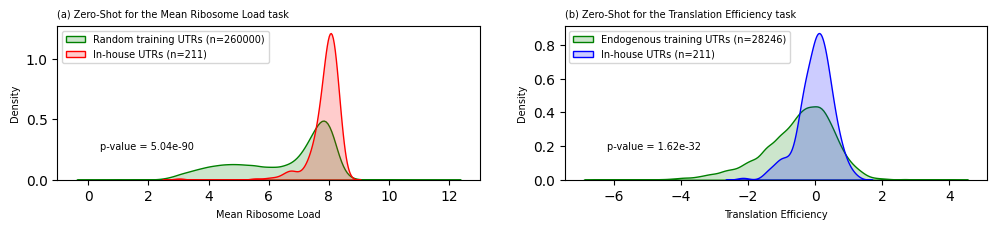

In [40]:
utrlm_mrl_spearman = spearmanr(mrl_res['label'], mrl_res['y_pred_pushLen50_MRL'])[0]
utrlm_te_spearman = spearmanr(te_res['label'], te_res['y_pred_pushLen100_TE'])[0]

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 2))

###

sns.kdeplot(sample_mrl, label = f'Random training UTRs (n={len(sample_mrl)})', shade = True, alpha = 0.2, ax = axes[0], color = 'green')
utrlm_mrl = mrl_res['y_pred_pushLen50_MRL']
sns.kdeplot(utrlm_mrl, 
            label = f'In-house UTRs (n={len(utrlm_mrl)})', shade = True, alpha = 0.2, ax = axes[0], color = 'red')
_, p_value_mrl = ttest_ind(sample_mrl, utrlm_mrl, equal_var = False)

###

sns.kdeplot(cao_te_log.values, label = f'Endogenous training UTRs (n={len(cao_te_log)})', shade = True, alpha = 0.2, ax = axes[1], color = 'green')
utrlm_te = te_res['y_pred_pushLen100_TE']
sns.kdeplot(utrlm_te, 
            label = f'In-house UTRs (n={len(utrlm_te)})', shade = True, alpha = 0.2, ax = axes[1], color = 'blue')
_, p_value_te = ttest_ind(cao_te_log, utrlm_te, equal_var = False)

###
axes[0].legend(fontsize = 7, loc = 'upper left')
axes[1].legend(fontsize = 7, loc = 'upper left')
axes[0].set_xlabel('Mean Ribosome Load', size = 7)
axes[1].set_xlabel('Translation Efficiency', size = 7)
axes[1].set_ylabel('Density', size = 7)
axes[0].set_ylabel('Density', size = 7)
axes[0].text(x=0.1, y=0.2, s=f'p-value = {p_value_mrl:.2e}', transform=axes[0].transAxes,size = 7)
axes[1].text(x=0.1, y=0.2, s=f'p-value = {p_value_te:.2e}', transform=axes[1].transAxes,size = 7)
axes[0].set_title('(a) Zero-Shot for the Mean Ribosome Load task', fontsize = 7, loc = 'left')
axes[1].set_title('(b) Zero-Shot for the Translation Efficiency task', fontsize = 7, loc = 'left')
plt.savefig('./revised_results/subfigureAB_predict_background.svg')
plt.show()

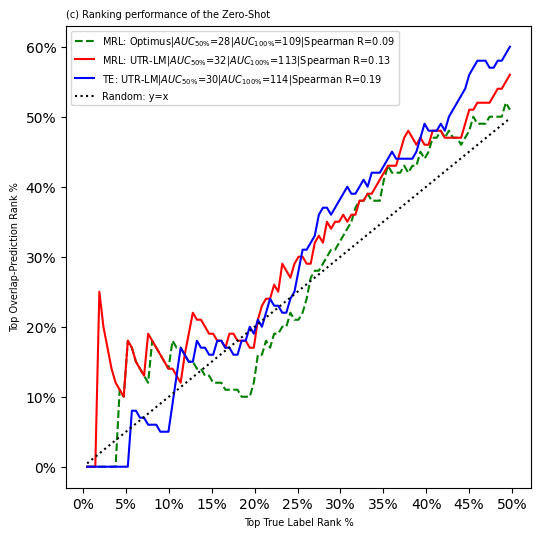

In [41]:
utrlm_mrl_spearman = spearmanr(mrl_res['label'], mrl_res['y_pred_pushLen50_MRL'])[0]
benm_mrl_spearman = spearmanr(optimus_results['label'], optimus_results['y_pred'])[0]
utrlm_te_spearman = spearmanr(te_res['label'], te_res['y_pred_pushLen100_TE'])[0]

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (6,6))

ratio = True
metric = 'Pred'
topk = int(211/2)
metric = f'Ratio: Top {metric} in Cut-Off'

te_utrlm = label_ranking_te.drop_duplicates()
temp_utrlm = label_ranking_mrl.drop_duplicates()
temp_benm = label_ranking_optimus.drop_duplicates()
n = int(temp_utrlm.iloc[-1]['# Samples'])

te_utrlm_auc_all = np.trapz(te_utrlm[metric])
temp_utrlm_auc_all = np.trapz(temp_utrlm[metric])
temp_benm_auc_all = np.trapz(temp_benm[metric])

te_utrlm = te_utrlm[te_utrlm['Cut-Off'] <= topk]
temp_utrlm = temp_utrlm[temp_utrlm['Cut-Off'] <= topk]
temp_benm = temp_benm[temp_benm['Cut-Off'] <= topk]
te_utrlm_auc_topk = np.trapz(te_utrlm[metric])
temp_utrlm_auc_topk = np.trapz(temp_utrlm[metric])
temp_benm_auc_topk = np.trapz(temp_benm[metric])

te_utrlm_smoothY = smoothing_KR(te_utrlm['Cut-Off']/n, te_utrlm[f'{metric}'])
temp_utrlm_smoothY = smoothing_KR(temp_utrlm['Cut-Off']/n, temp_utrlm[f'{metric}'])
temp_benm_smoothY = smoothing_KR(temp_benm['Cut-Off']/n, temp_benm[f'{metric}'])

axes.plot(temp_benm['Cut-Off']/n*100, 
      temp_benm[f'{metric}']*100, 
      '--', color = 'green', 
      label = "MRL: Optimus|${AUC_{50\%}}$=" + f"{temp_benm_auc_topk:.0f}|" + "${AUC_{100\%}}$=" + f"{temp_benm_auc_all:.0f}|Spearman R={benm_mrl_spearman:.2f}")

axes.plot(temp_utrlm['Cut-Off']/n*100, 
    temp_utrlm[f'{metric}']*100, 
    color = 'red', 
    label = "MRL: UTR-LM|${AUC_{50\%}}$=" + f"{temp_utrlm_auc_topk:.0f}|" + "${AUC_{100\%}}$=" + f"{temp_utrlm_auc_all:.0f}|Spearman R={utrlm_mrl_spearman:.2f}")

axes.plot(te_utrlm['Cut-Off']/n*100, 
    te_utrlm[f'{metric}']*100, 
    color = 'blue', 
    label = "TE: UTR-LM|${AUC_{50\%}}$=" + f"{te_utrlm_auc_topk:.0f}|" + "${AUC_{100\%}}$=" + f"{te_utrlm_auc_all:.0f}|Spearman R={utrlm_te_spearman:.2f}")

axes.plot(temp_utrlm['Cut-Off']/n*100, 
     temp_utrlm['Cut-Off']/n*100, 
     ':', color = 'black', 
     label = 'Random: y=x')

axes.set_xlabel('Top True Label Rank %', size = 7)
axes.set_ylabel('Top Overlap-Prediction Rank %', size = 7)
axes.legend(fontsize = 7, loc = 'upper left')

axes.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f%%'))
axes.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f%%'))
axes.set_xticks(range(0,51,5))
axes.set_title(f'(c) Ranking performance of the Zero-Shot', fontsize = 7, loc = 'left')
plt.savefig('./revised_results/subfigureC_ranking_performance_zeroshot.svg')
plt.show()